In [1]:
! pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ----------------------- ---------------- 11.5/19.4 MB 60.0 MB/s eta 0:00:01
   ---------------------------------------- 19.4/19.4 MB 53.9 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [konlpy]
   ---------------------------------------- 2/2 [konlpy]



konlpy에서 제공하는 말뭉치를 가지고 오자. 연습용으로 라이브러리안에 포함된거야.

In [3]:
from konlpy.corpus import kolaw, kobill

헌법 말뭉치

In [4]:
kolaw.fileids()

['constitution.txt']

법안 말뭉치

In [5]:
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

대한민국 헌법 데이터 100자 읽어오기

In [6]:
c=kolaw.open('constitution.txt').read()
print(c[:100])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


국회 법안 데이터 100자 읽어오기

In [7]:
k=kobill.open('1809890.txt').read()
print(k[:100])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이


KoNLPy 활용 - 형태소 분석기!
 * 여러 분석기를 다 import 하겠다.

In [10]:
from konlpy.tag import *
hannanum=Hannanum()
kkma=Kkma()
komoran=Komoran()
okt=Okt()



4가지 분석기를 가지고, 100개의 대한민국 헌법을 뽑아온 것을 명사 추출해보자.
한나눔 : 카이스트에서 개발한 것

In [ ]:
print(c[:100])
hannanum.nouns(c[:100]) #유구한 에서 유구/ 빛나는 에서 빛 -> 명사만 추출

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


['대한민국헌법',
 '유구',
 '역사',
 '전통',
 '빛',
 '우리',
 '대한국민',
 '3·1운동',
 '건립',
 '대한민국임시정부',
 '법통',
 '불의',
 '항거',
 '4·19민주이념',
 '계승',
 '조국',
 '민주개혁',
 '평화적',
 '통일']

꼬꼬마

In [13]:
kkma.nouns(c[:100])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동',
 '건립',
 '대한민국임시정부',
 '임시',
 '정부',
 '법통',
 '불의',
 '항거',
 '4',
 '19',
 '19민주이념',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주개혁',
 '개혁',
 '평화적',
 '통일']

komoran

In [15]:
komoran.nouns(c[:100])

['대한민국',
 '헌법',
 '역사',
 '전통',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시',
 '정부',
 '법통',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주개혁',
 '평화',
 '통일']

okt

In [14]:
okt.nouns(c[:100])

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일']

명사 찾기.

In [17]:
s1='빅데이터 개념이 어렵네요 Oh ㅠㅠㅠㅠ'
print(hannanum.nouns(s1))
print(kkma.nouns(s1))
print(komoran.nouns(s1))
print(okt.nouns(s1))

['빅데이터', '개념', 'ㅠㅠㅠㅠ']
['빅', '빅데이터', '데이터', '개념']
['빅', '데이터', '개념']
['빅데이터', '개념']


품사 태깅

In [19]:
print(hannanum.pos(s1))
print(kkma.pos(s1))
print(komoran.pos(s1))
print(okt.pos(s1))

[('빅데이터', 'N'), ('개념', 'N'), ('이', 'J'), ('어렵', 'P'), ('네', 'E'), ('요', 'J'), ('Oh', 'F'), ('ㅠㅠㅠㅠ', 'N')]
[('빅', 'NNG'), ('데이터', 'NNG'), ('개념', 'NNG'), ('이', 'JKS'), ('어렵', 'VA'), ('네요', 'EFN'), ('Oh', 'OL'), ('ㅠㅠㅠㅠ', 'EMO')]
[('빅', 'NNG'), ('데이터', 'NNG'), ('개념', 'NNG'), ('이', 'JKS'), ('어렵', 'VA'), ('네요', 'EC'), ('Oh', 'SL'), ('ㅠㅠㅠㅠ', 'NA')]
[('빅데이터', 'Noun'), ('개념', 'Noun'), ('이', 'Josa'), ('어렵네요', 'Adjective'), ('Oh', 'Alpha'), ('ㅠㅠㅠㅠ', 'KoreanParticle')]


형태소 이름 알고 싶으면

In [23]:
# hannanum.tagset
# okt.tagset
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [24]:
from nltk import Text
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

한글폰트 가지고 오기
window 가서 속성으로 이름 가지고 왔어.

In [34]:
font_path='c:/Windows/fonts/batang.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

#대한민국 헌법에서 단어만 다 뽑아옴

<Axes: xlabel='Samples', ylabel='Counts'>

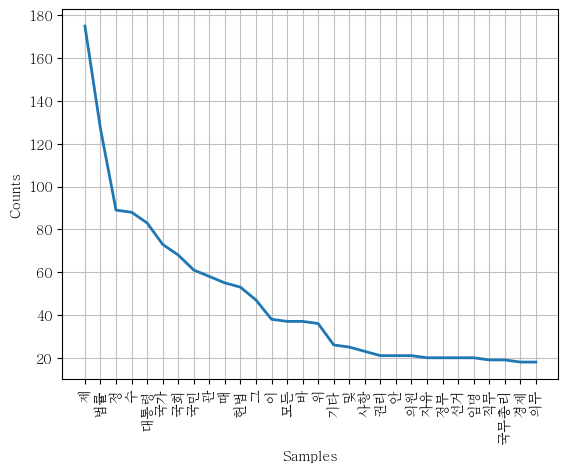

In [35]:
kolaw_nouns=Text(okt.nouns(c))
kolaw_nouns.plot(30)

단어 빈도수 , counter로도 셀수있어

In [38]:
kv=kolaw_nouns.vocab()
kv

FreqDist({'제': 175, '법률': 127, '정': 89, '수': 88, '대통령': 83, '국가': 73, '국회': 68, '국민': 61, '관': 58, '때': 55, ...})

딕셔너리 key에 글자수가 2자 이상인 것만 남기고 싶어.
새로운 kv2 딕셔너리를 만들자.

In [41]:
kv2=dict()
for key, value in kv.items(): #튜플로 만들어서
  if len(key)>1 and value >2: #빈도수가 2보다 큰 것이 
    kv2[key]=value
kv2
   

{'대한민국': 11,
 '헌법': 53,
 '우리': 3,
 '국민': 61,
 '민주': 6,
 '조국': 3,
 '평화': 6,
 '통일': 6,
 '로써': 5,
 '민족': 3,
 '공고': 3,
 '모든': 37,
 '사회': 8,
 '질서': 8,
 '정치': 9,
 '경제': 18,
 '문화': 4,
 '영역': 4,
 '기회': 3,
 '능력': 3,
 '자유': 20,
 '권리': 21,
 '책임': 5,
 '의무': 18,
 '생활': 8,
 '향상': 5,
 '제정': 8,
 '개정': 6,
 '국회': 68,
 '의결': 17,
 '국민투표': 7,
 '법률': 127,
 '국가': 73,
 '보호': 14,
 '정책': 14,
 '수립': 7,
 '국제': 4,
 '유지': 7,
 '노력': 13,
 '국군': 4,
 '안전보장': 10,
 '국토': 3,
 '수행': 4,
 '중립성': 3,
 '체결': 4,
 '공포': 10,
 '조약': 11,
 '승인': 6,
 '효력': 9,
 '지위': 3,
 '보장': 13,
 '공무원': 17,
 '대한': 10,
 '대하': 9,
 '신분': 3,
 '정당': 14,
 '목적': 4,
 '조직': 18,
 '활동': 3,
 '운영': 5,
 '정부': 20,
 '헌법재판소': 14,
 '해산': 5,
 '제소': 3,
 '심판': 10,
 '발전': 5,
 '인간': 3,
 '개인': 3,
 '기본': 5,
 '누구': 6,
 '종교': 3,
 '제도': 4,
 '인정': 8,
 '영전': 3,
 '신체': 3,
 '체포': 9,
 '구속': 8,
 '압수': 3,
 '수색': 3,
 '절차': 9,
 '처벌': 3,
 '형사': 9,
 '진술': 5,
 '검사': 4,
 '법관': 15,
 '영장': 4,
 '다만': 11,
 '현행범인': 3,
 '경우': 17,
 '이상': 17,
 '증거': 3,
 '청구': 6,
 '당한': 3,
 '변호인': 4,
 '피고인': 6,
 '이유

key, value 붙은 걸 item으로 떼고 튜플 만들어

In [ ]:
print(kv.keys())
print(kv.values())
print(kv.items()) # 하나씩 떼서 튜플로 만들어줘.

dict_keys(['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '문화', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '생활', '향상', '기하', '밖', '항구', '세계', '인류', '공영', '이바지', '함', '자손', '안전', '행복', '확보', '것', '다짐', '제정', '차', '개정', '이제', '국회', '의결', '국민투표', '제', '장', '강', '민주공화국', '주권', '권력', '요건', '법률', '정', '국가', '바', '재외국민', '보호', '영토', '한반도', '그', '부속', '도서', '지향', '입각', '정책', '수립', '추진', '국제', '유지', '노력', '침략', '전쟁', '부인', '국군', '안전보장', '국토', '방위', '수행', '중립성', '준수', '체결', '공포', '조약', '일반', '승인', '법규', '국내법', '효력', '외국인', '지위', '보장', '공무원', '전체', '대한', '봉사자', '대하', '신분', '정당', '설립', '복수정당제', '목적', '조직', '활동', '의사', '형성', '참여', '운영', '자금', '보조', '수', '위배', '때', '정부', '헌법재판소', '해산', '제소', '심판', '전통문화', '발전', '창달', '인간', '존엄', '가치', '가지', '추구', '개인

서체를 안넣으면 한글 안돼.

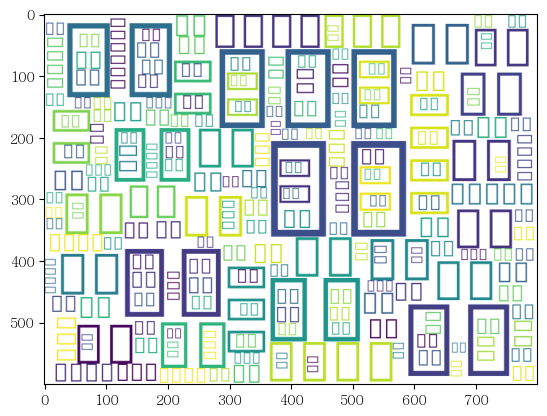

In [42]:
from wordcloud import WordCloud
wc=WordCloud(width=800, height=600, background_color='white')
plt.imshow(wc.generate_from_frequencies(kv2))


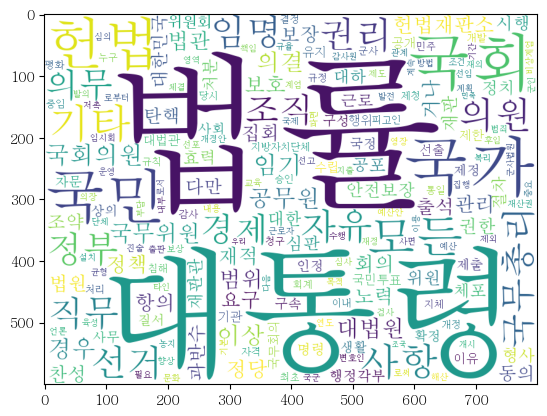

In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=800, height=600, background_color='white', font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kv2))

색도 바꿔볼까나

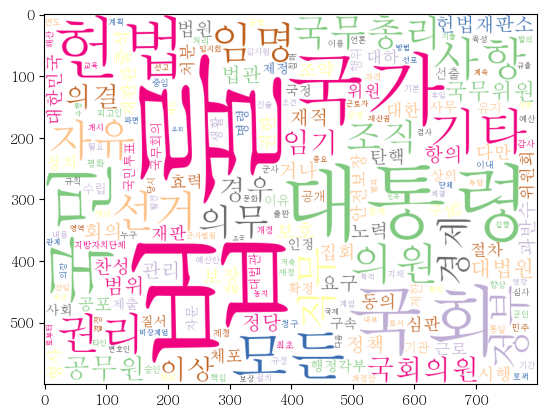

In [46]:
from wordcloud import WordCloud
wc=WordCloud(width=800, height=600, background_color='white',
              font_path=font_path, colormap='Accent_r', random_state=0)
plt.imshow(wc.generate_from_frequencies(kv2))

도형에 글자 넣기

단어 갯수 세기

In [ ]:
from collections import Counter
s1 = 'aabbccccddd'
list1=['abc','abc','aa','aa','bb','bb','bb']

counter1 = Counter(s1) #문자가 몇개인가
counter2 = Counter(list1) #같은 문자열이 몇개인가
print(counter1) #단어의 빈도수를 계산할 수 있어
print(counter2)


Counter({'c': 4, 'd': 3, 'a': 2, 'b': 2})
Counter({'bb': 3, 'abc': 2, 'aa': 2})


c는 대한민국 헌법

In [51]:
nouns1 = okt.nouns(c)
nouns1
fd_nouns1 = Text(nouns1).vocab() #Text 객체의 단어 빈도수 구하는 함수.
fd_nouns1

FreqDist({'제': 175, '법률': 127, '정': 89, '수': 88, '대통령': 83, '국가': 73, '국회': 68, '국민': 61, '관': 58, '때': 55, ...})

빈도수 구해줘

In [ ]:
cnt_nouns1=Counter(nouns1)
print(cnt_nouns1) #딕셔너리형태로 나와



Counter({'제': 175, '법률': 127, '정': 89, '수': 88, '대통령': 83, '국가': 73, '국회': 68, '국민': 61, '관': 58, '때': 55, '헌법': 53, '그': 47, '이': 38, '모든': 37, '바': 37, '위': 36, '기타': 26, '및': 25, '사항': 23, '권리': 21, '안': 21, '의원': 21, '자유': 20, '정부': 20, '선거': 20, '임명': 20, '직무': 19, '국무총리': 19, '경제': 18, '의무': 18, '조직': 18, '국회의원': 18, '임기': 18, '의결': 17, '공무원': 17, '경우': 17, '이상': 17, '국무위원': 17, '대법원': 17, '범위': 16, '장': 15, '법관': 15, '보호': 14, '정책': 14, '정당': 14, '헌법재판소': 14, '재적': 14, '회의': 14, '항의': 14, '관리': 14, '노력': 13, '보장': 13, '거나': 13, '요구': 13, '법원': 12, '집회': 12, '과반수': 12, '출석': 12, '찬성': 12, '대한민국': 11, '조약': 11, '다만': 11, '재판': 11, '인': 11, '동의': 11, '탄핵': 11, '권한': 11, '안전보장': 10, '공포': 10, '대한': 10, '심판': 10, '시행': 10, '재판관': 10, '위원': 10, '정치': 9, '효력': 9, '대하': 9, '체포': 9, '절차': 9, '형사': 9, '근로': 9, '처분': 9, '위원회': 9, '행정각부': 9, '명령': 9, '사회': 8, '질서': 8, '생활': 8, '제정': 8, '인정': 8, '구속': 8, '구성': 8, '확정': 8, '상의': 8, '제출': 8, '항': 8, '국정': 8, '자문': 8, '사무': 8, '것': 7, '국민투표': 7

In [ ]:

#빈도수 높은거 10개만
cnt_nouns2=cnt_nouns1.most_common(10)
cnt_nouns2 #튜플의 리스트로 나와

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('때', 55)]

형태소 분석기로 단어를 뽑으면 list일 뿐,
text로 vocab을 하던지 counter로 싸주던지 해야지 카운팅 됨.

In [63]:
cnt_nouns3 = dict()
for key, value in cnt_nouns2:
  print(key, value)
  if(len(key)>=2 and value>1): #2자 이상인걸 가지고 오고 싶다.
    cnt_nouns3[key]=value
cnt_nouns3

제 175
법률 127
정 89
수 88
대통령 83
국가 73
국회 68
국민 61
관 58
때 55


{'법률': 127, '대통령': 83, '국가': 73, '국회': 68, '국민': 61}

In [64]:
cnt_nouns3 = dict()
for key, value in cnt_nouns1.items(): #튜플리스트가 아니라서 items로
  print(key, value)
  if(len(key)>=2 and value>1): #2자 이상인걸 가지고 오고 싶다.
    cnt_nouns3[key]=value
cnt_nouns3

대한민국 11
헌법 53
유구 1
역사 1
전통 1
우리 3
국민 61
운동 2
건립 1
임시정부 1
법 3
통과 1
불의 2
항거 1
민주 6
이념 1
계승 2
조국 3
개혁 1
평화 6
통일 6
사명 2
입 1
각하 1
정의 1
인도 1
동포 1
애 1
로써 5
민족 3
단결 1
공고 3
모든 37
사회 8
폐습 1
타파 1
자율 2
조화 2
바탕 1
자유민주 2
질서 8
더욱 1
정치 9
경제 18
문화 4
영역 4
각인 1
기회 3
능력 3
최고 2
도로 1
발휘 1
자유 20
권리 21
책임 5
의무 18
완수 1
안 21
생활 8
향상 5
기하 1
밖 1
항구 1
세계 1
인류 1
공영 1
이바지 1
함 5
자손 1
안전 1
행복 2
확보 1
것 7
다짐 1
제정 8
차 4
개정 6
이제 1
국회 68
의결 17
국민투표 7
제 175
장 15
강 1
민주공화국 1
주권 2
권력 1
요건 1
법률 127
정 89
국가 73
바 37
재외국민 1
보호 14
영토 2
한반도 1
그 47
부속 1
도서 1
지향 1
입각 1
정책 14
수립 7
추진 1
국제 4
유지 7
노력 13
침략 1
전쟁 1
부인 1
국군 4
안전보장 10
국토 3
방위 1
수행 4
중립성 3
준수 2
체결 4
공포 10
조약 11
일반 2
승인 6
법규 1
국내법 1
효력 9
외국인 1
지위 3
보장 13
공무원 17
전체 1
대한 10
봉사자 1
대하 9
신분 3
정당 14
설립 1
복수정당제 1
목적 4
조직 18
활동 3
의사 2
형성 1
참여 1
운영 5
자금 1
보조 1
수 88
위배 2
때 55
정부 20
헌법재판소 14
해산 5
제소 3
심판 10
전통문화 1
발전 5
창달 2
인간 3
존엄 2
가치 1
가지 2
추구 1
개인 3
불가침 1
기본 5
인권 1
확인 1
앞 2
누구 6
성별 1
종교 3
차별 2
특수 1
계급 1
제도 4
인정 8
형태 1
도 2
창설 1
훈장 2
등 6
영전 3
자 4
특권 1
이 38
신체 3
체포 9
구속 8
압수 3
수색 3
심문 

{'대한민국': 11,
 '헌법': 53,
 '우리': 3,
 '국민': 61,
 '운동': 2,
 '불의': 2,
 '민주': 6,
 '계승': 2,
 '조국': 3,
 '평화': 6,
 '통일': 6,
 '사명': 2,
 '로써': 5,
 '민족': 3,
 '공고': 3,
 '모든': 37,
 '사회': 8,
 '자율': 2,
 '조화': 2,
 '자유민주': 2,
 '질서': 8,
 '정치': 9,
 '경제': 18,
 '문화': 4,
 '영역': 4,
 '기회': 3,
 '능력': 3,
 '최고': 2,
 '자유': 20,
 '권리': 21,
 '책임': 5,
 '의무': 18,
 '생활': 8,
 '향상': 5,
 '행복': 2,
 '제정': 8,
 '개정': 6,
 '국회': 68,
 '의결': 17,
 '국민투표': 7,
 '주권': 2,
 '법률': 127,
 '국가': 73,
 '보호': 14,
 '영토': 2,
 '정책': 14,
 '수립': 7,
 '국제': 4,
 '유지': 7,
 '노력': 13,
 '국군': 4,
 '안전보장': 10,
 '국토': 3,
 '수행': 4,
 '중립성': 3,
 '준수': 2,
 '체결': 4,
 '공포': 10,
 '조약': 11,
 '일반': 2,
 '승인': 6,
 '효력': 9,
 '지위': 3,
 '보장': 13,
 '공무원': 17,
 '대한': 10,
 '대하': 9,
 '신분': 3,
 '정당': 14,
 '목적': 4,
 '조직': 18,
 '활동': 3,
 '의사': 2,
 '운영': 5,
 '위배': 2,
 '정부': 20,
 '헌법재판소': 14,
 '해산': 5,
 '제소': 3,
 '심판': 10,
 '발전': 5,
 '창달': 2,
 '인간': 3,
 '존엄': 2,
 '가지': 2,
 '개인': 3,
 '기본': 5,
 '누구': 6,
 '종교': 3,
 '차별': 2,
 '제도': 4,
 '인정': 8,
 '훈장': 2,
 '영전': 3,
 '신체': 3,
 '체포': 9,


워드크라우드 만들어보기